# Analisando as proposições de 2002 - 2006

### Os dados utilizados se encontram no portal de dados abertos da Câmara dos Deputados como sendo referentes aos anos de 2002 até 2006.

#### Link do portal: https://dadosabertos.camara.leg.br/swagger/api.html

#### Foi feito o download do arquivo no formato json disponibilizado no site, o mesmo foi processado por um script feito em python responsável por realizar o parsing e gerar um outro arquivo no formato csv.

#### Carregamento dos dados:

In [1]:
import pandas as pd

data = pd.read_csv('proposicoes/proposicoes_2002_2006.csv', encoding = 'utf8', header = 0)

## Visão Geral

In [2]:
data.shape

(11899, 56)

#### O arquivo contém, portanto, 11899 linhas com proposições e 56 colunas para cada uma. Três primeiras linhas:

In [39]:
data.head(3)

,COD_ORGAO_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_LEGISLATURA_LEI,NOM_PARTIDO_POLITICO,DAT_VETO_TOTAL,NOM_UF,DES_TIPO_PROPOSICAO,DES_COMPLETA,COD_TIPO_NORMA_JURIDICA_ORIGEM,SIG_UF,...,COD_TIPO_AUTOR_ORIGEM,NUM_SESSAO_LEGISLATIVA_LEI,DAT_FIM_LEGISLATURA_APRESEN,SIG_PARTIDO_POLITICO,IND_ATIVO_TIPO_PROPOSICAO,DAT_INICIO_LEGISLATURA_APRESEN,NUM_PROPOSICAO,COD_TIPO_SESSAO_LEGISLATIVA_LEI,NOM_PARLAMENTAR,DAT_FINAL_RECESSO_APRESEN
0,-1,52,-1,PARTIDO TRABALHISTA BRASILEIRO,NaN,MINAS GERAIS,PROJETO DE LEI,PROJETO DE LEI,-1,MG,...,TipoParlamentar_10000,-1.0,31-01-2007,PTB,1,01-02-2003,1989.0,-1.0,RONALDO VASCONCELLOS,01-08-2003
1,-1,52,52,PARTIDO SOCIALISTA BRASILEIRO,NaN,RIO GRANDE DO SUL,PROJETO DE LEI,PROJETO DE LEI,37,RS,...,TipoParlamentar_10000,5.0,31-01-2007,PSB,1,01-02-2003,1923.0,2.0,BETO ALBUQUERQUE,01-08-2003
2,-1,52,-1,PARTIDO DE REEDIFICAÇÃO DA ORDEM NACIONAL,NaN,SÃO PAULO,PROJETO DE LEI,PROJETO DE LEI,-1,SP,...,TipoParlamentar_10000,-1.0,31-01-2007,PRONA,1,01-02-2003,1165.0,-1.0,ELIMAR MÁXIMO DAMASCENO,01-08-2003


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11899 entries, 0 to 11898
Data columns (total 56 columns):
COD_ORGAO_ORIGEM                         11899 non-null int64
NUM_LEGISLATURA_APRESEN                  11899 non-null int64
NUM_LEGISLATURA_LEI                      11899 non-null int64
NOM_PARTIDO_POLITICO                     8368 non-null object
DAT_VETO_TOTAL                           45 non-null object
NOM_UF                                   8369 non-null object
DES_TIPO_PROPOSICAO                      11899 non-null object
DES_COMPLETA                             11706 non-null object
COD_TIPO_NORMA_JURIDICA_ORIGEM           11899 non-null int64
SIG_UF                                   8369 non-null object
DAT_FIM_LEGISLATURA_LEI                  3044 non-null object
COD_PROPOSICAO_ORIGEM                    11888 non-null float64
DES_ATIVO_TIPO_PROPOSICAO                11899 non-null object
NOM_ORGAO                                3530 non-null object
DES_APELIDO_ORGAO   

In [6]:
data.isnull().any()

COD_ORGAO_ORIGEM                         False
NUM_LEGISLATURA_APRESEN                  False
NUM_LEGISLATURA_LEI                      False
NOM_PARTIDO_POLITICO                      True
DAT_VETO_TOTAL                            True
NOM_UF                                    True
DES_TIPO_PROPOSICAO                      False
DES_COMPLETA                              True
COD_TIPO_NORMA_JURIDICA_ORIGEM           False
SIG_UF                                    True
DAT_FIM_LEGISLATURA_LEI                   True
COD_PROPOSICAO_ORIGEM                     True
DES_ATIVO_TIPO_PROPOSICAO                False
NOM_ORGAO                                 True
DES_APELIDO_ORGAO                         True
DATAPRESENTACAOPROPOSICAO                False
DES_TIPO_AUTOR                           False
COD_SEXO                                  True
IND_ATIVO_ORGAO                          False
COD_TIPO_PARLAMENTAR                     False
DES_TIPO_NORMA_JURIDICA                   True
DES_TIPO_SESS

#### Das 56 totais, apenas 20 colunas estão completas, as outras possuem pelo menos uma linha sem informação.

### Veremos agora as relações entre as proposições e as informações de algumas colunas.

## Proposições x Estados

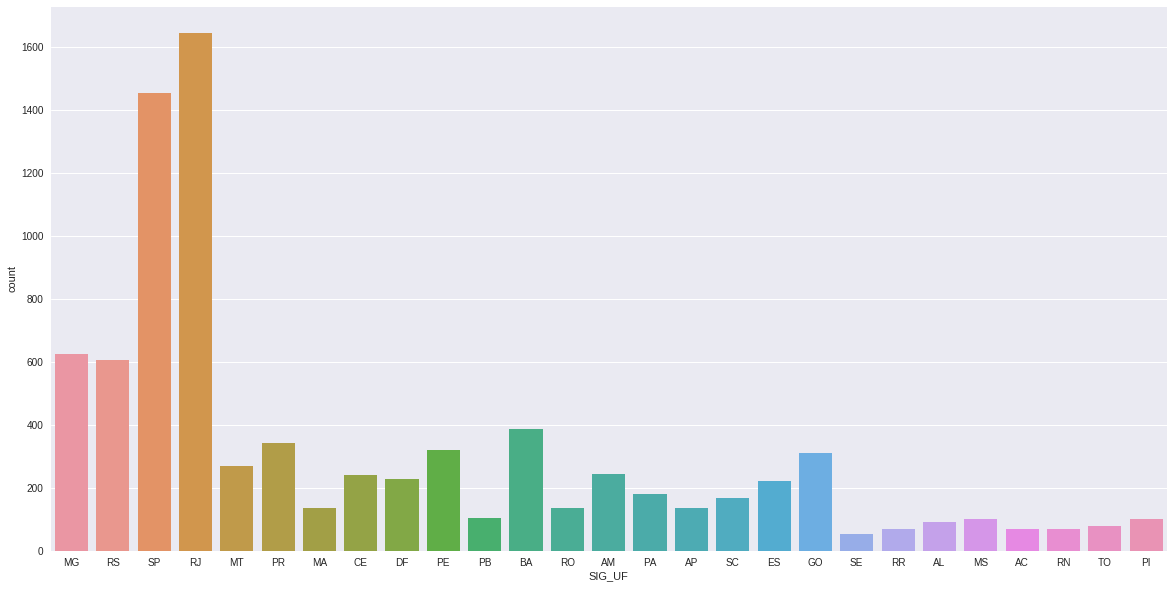

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_UF'], label = "Quantidade")

#### Ranking dos 6 estados com mais proposições e as respectivas quantidades.

In [41]:
uf_list = data['SIG_UF'].tolist()
uf_counter = {}

for word in uf_list:
    if word in uf_counter:
        uf_counter[word] += 1
    else:
        uf_counter[word] = 1
        
popular_uf = sorted(uf_counter, key = uf_counter.get, reverse = True)
top_6 = popular_uf[:7]

for uf in top_6:
    if type(uf)!= float:
        print(uf + ': ' + str(uf_counter[uf]) + ' proposições')
    else:
        print('Sem a informação do estado: ' + str(uf_counter[uf]) + ' proposições')

Sem a informação do estado: 3530 proposições
RJ: 1643 proposições
SP: 1453 proposições
MG: 623 proposições
RS: 606 proposições
BA: 386 proposições
PR: 342 proposições


#### Quantidade de proposições em cada estado:

In [10]:
uf_counter

{'MG': 623,
 'RS': 606,
 'SP': 1453,
 'RJ': 1643,
 'MT': 268,
 'PR': 342,
 'MA': 136,
 'CE': 239,
 'DF': 228,
 'PE': 319,
 'PB': 104,
 'BA': 386,
 'RO': 135,
 'AM': 243,
 'PA': 180,
 'AP': 137,
 'SC': 168,
 'ES': 221,
 'GO': 309,
 'SE': 52,
 'RR': 70,
 'AL': 91,
 'MS': 100,
 'AC': 68,
 'RN': 68,
 'TO': 79,
 'PI': 101,
 nan: 3530}

## Proposições x Gênero

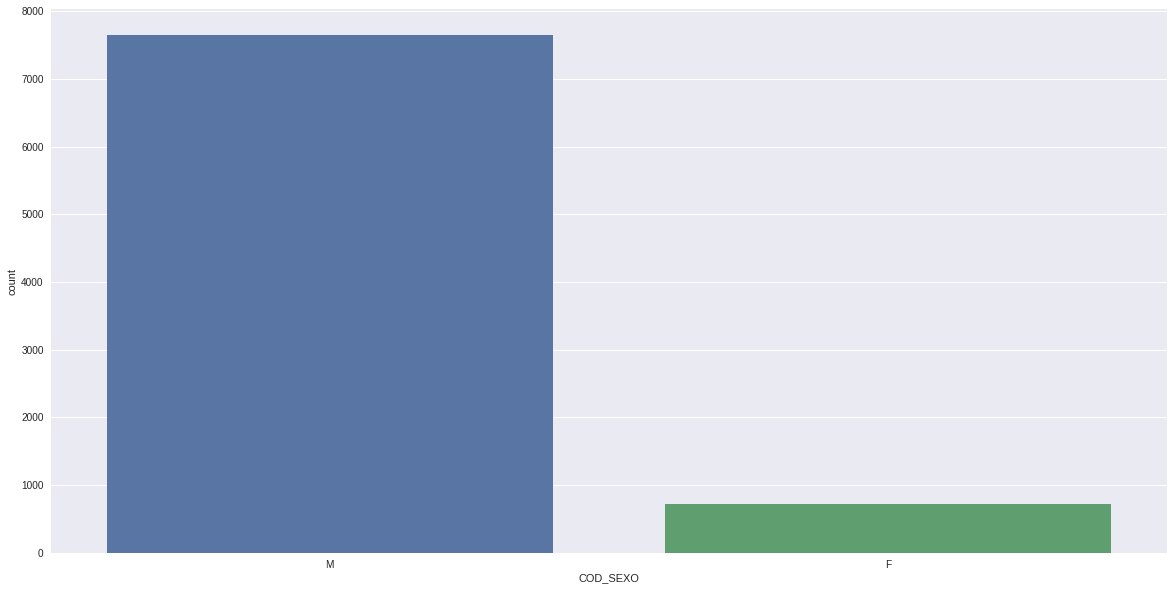

In [12]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['COD_SEXO'], label = "Quantidade")

In [43]:
gender_list = data['COD_SEXO'].tolist()
gender_counter = {}

for gender in gender_list:
    if gender in gender_counter:
        gender_counter[gender] += 1
    else:
        gender_counter[gender] = 1
        
gender_counter

{'M': 7647, 'F': 722, nan: 3530}

#### Grande maioria das proposições vieram de homens sendo que 3530 não informam o gênero da pessoa que propôs.

## Proposições x Temas

#### Ranking dos 6 temas mais frequentes:

In [44]:
theme_list = data['AREAS_TEMATICAS_APRESENTACAO'].tolist()
theme_counter = {}

for theme in theme_list:
    if theme in theme_counter:
        theme_counter[theme] += 1
    else:
        theme_counter[theme] = 1
        
popular_themes = sorted(theme_counter, key = theme_counter.get, reverse = True)
top_6 = popular_themes[:7]

for theme in top_6:
    print(theme + ': ' + str(theme_counter[theme]) + ' proposições')

COMUNICAÇÕES: 2362 proposições
TRABALHO E EMPREGO: 737 proposições
EDUCAÇÃO: 622 proposições
ADMINISTRAÇÃO PÚBLICA: 616 proposições
TRIBUTAÇÃO: 563 proposições
ORGANIZAÇÃO POLÍTICO-ADMINISTRATIVA DO ESTADO (UTILIZADO ATÉ A LEGISLATURA 53): 492 proposições
INDÚSTRIA, COMÉRCIO E DEFESA DO CONSUMIDOR (UTILIZADO ATÉ A LEGISLATURA 53): 474 proposições


## Proposições x Tipo do Autor

#### Ranking dos tipos de autores do mais frequente ao menos frequente:

In [45]:
author_type_list = data['DES_TIPO_AUTOR'].tolist()
author_type_counter = {}

for author_type in author_type_list:
    if author_type in author_type_counter:
        author_type_counter[author_type] += 1
    else:
        author_type_counter[author_type] = 1
        
popular_author_type = sorted(author_type_counter, key = author_type_counter.get, reverse = True)

for author_type in popular_author_type:
    if author_type_counter[author_type] != 1:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposições')
    else:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposição')

DEPUTADO: 8369 proposições
COMISSÃO PERMANENTE: 2506 proposições
ÓRGÃO DO PODER EXECUTIVO: 444 proposições
ÓRGÃO DO PODER LEGISLATIVO: 410 proposições
COMISSÃO PARLAMENTAR DE INQUÉRITO: 43 proposições
COMISSÃO DIRETORA: 41 proposições
ÓRGÃO DO PODER JUDICIÁRIO: 32 proposições
COMISSÃO ESPECIAL: 15 proposições
COMISSÃO PARLAMENTAR MISTA DE INQUÉRITO: 14 proposições
COMISSÃO MISTA PERMANENTE: 10 proposições
MPU - MINISTÉRIO PÚBLICO DA UNIÃO: 7 proposições
CONSELHO: 4 proposições
ÓRGÃO DO SENADO FEDERAL: 2 proposições
COMISSÃO MISTA ESPECIAL: 2 proposições


#### A grande maioria das proposições vieram diretamente dos deputados.

## Proposições x Ano

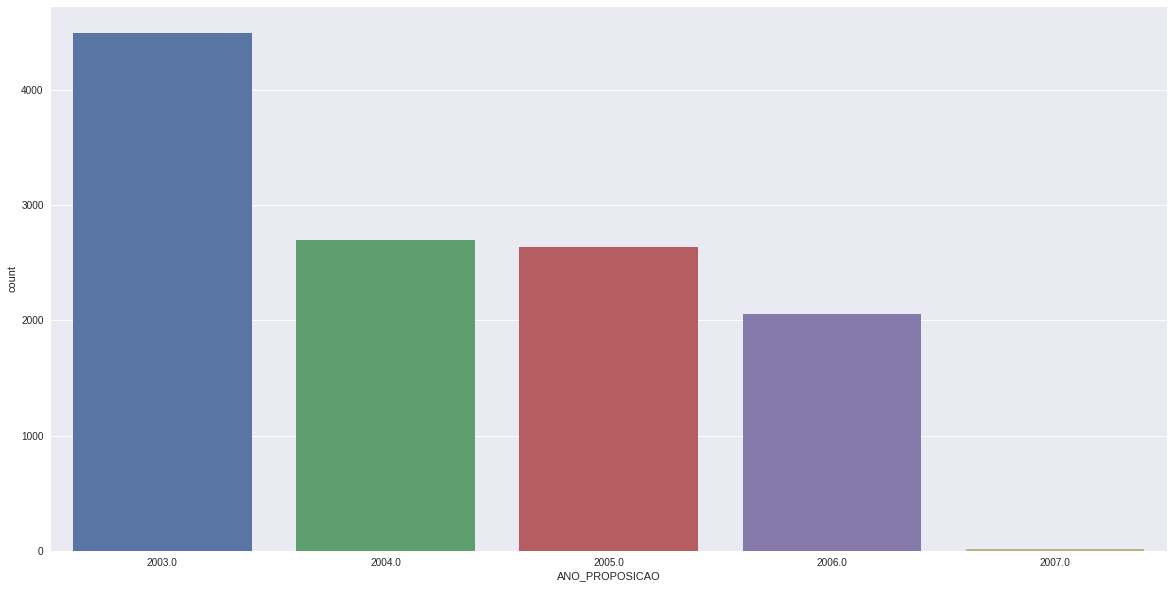

In [21]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['ANO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [46]:
year_list = data['ANO_PROPOSICAO'].tolist()
year_counter = {}

for year in year_list:
    if year in year_counter:
        year_counter[year] += 1
    else:
        year_counter[year] = 1
        
popular_year = sorted(year_counter, key = year_counter.get, reverse = True)

for year in popular_year:
    if year_counter[year] != 1:
        print(str(year) + ': ' + str(year_counter[year]) + ' proposições')

2003.0: 4491 proposições
2004.0: 2692 proposições
2005.0: 2636 proposições
2006.0: 2050 proposições
2007.0: 19 proposições


## Proposições x Região

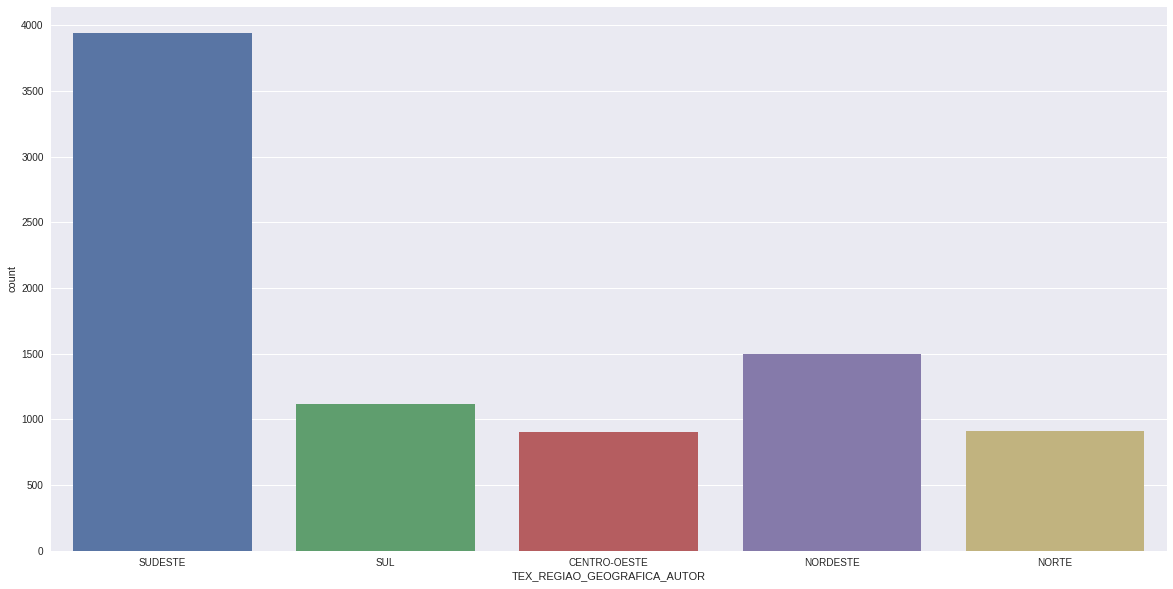

In [23]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['TEX_REGIAO_GEOGRAFICA_AUTOR'], label = "Quantidade")

#### Ranking:

In [47]:
region_list = data['TEX_REGIAO_GEOGRAFICA_AUTOR'].tolist()
region_counter = {}

for region in region_list:
    if region in region_counter:
        region_counter[region] += 1
    else:
        region_counter[region] = 1
        
popular_region = sorted(region_counter, key = region_counter.get, reverse = True)

for region in popular_region:
    if type(region) != float:
        print(region + ': ' + str(region_counter[region]) + ' proposições')
    else:
        print('Sem informação de região: ' + str(region_counter[region]) + ' proposições')

SUDESTE: 3940 proposições
Sem informação de região: 3530 proposições
NORDESTE: 1496 proposições
SUL: 1116 proposições
NORTE: 912 proposições
CENTRO-OESTE: 905 proposições


## Proposições x Tipos

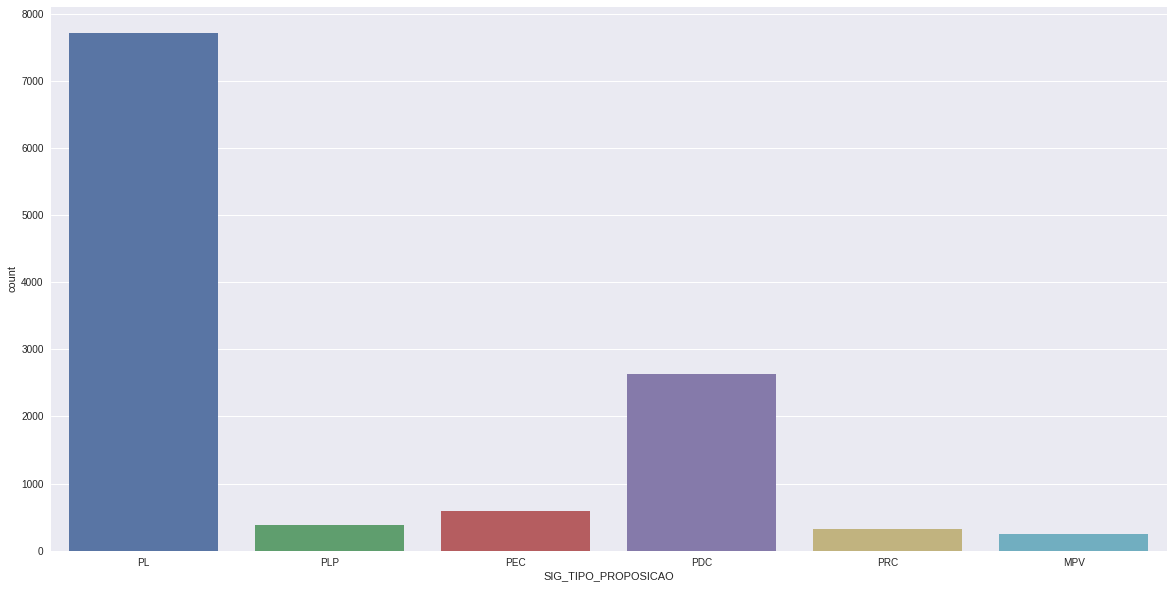

In [25]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_TIPO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [48]:
proposition_list = data['SIG_TIPO_PROPOSICAO'].tolist()
proposition_counter = {}

for proposition in proposition_list:
    if proposition in proposition_counter:
        proposition_counter[proposition] += 1
    else:
        proposition_counter[proposition] = 1
        
popular_proposition = sorted(proposition_counter, key = proposition_counter.get, reverse = True)

for proposition in popular_proposition:
    print(proposition + ': ' + str(proposition_counter[proposition]) + ' proposições')

PL: 7709 proposições
PDC: 2631 proposições
PEC: 590 proposições
PLP: 387 proposições
PRC: 330 proposições
MPV: 252 proposições


#### Legenda: 

* PL = Projetos de Lei 
* PDC = Projetos de Decreto Legislativo da Câmara
* PLP = Projetos de Lei Complementar
* PEC = Projetos de Emenda à Constituição
* MPV = Medidas Provisórias (MPV)

## Proposições x Partidos Políticos

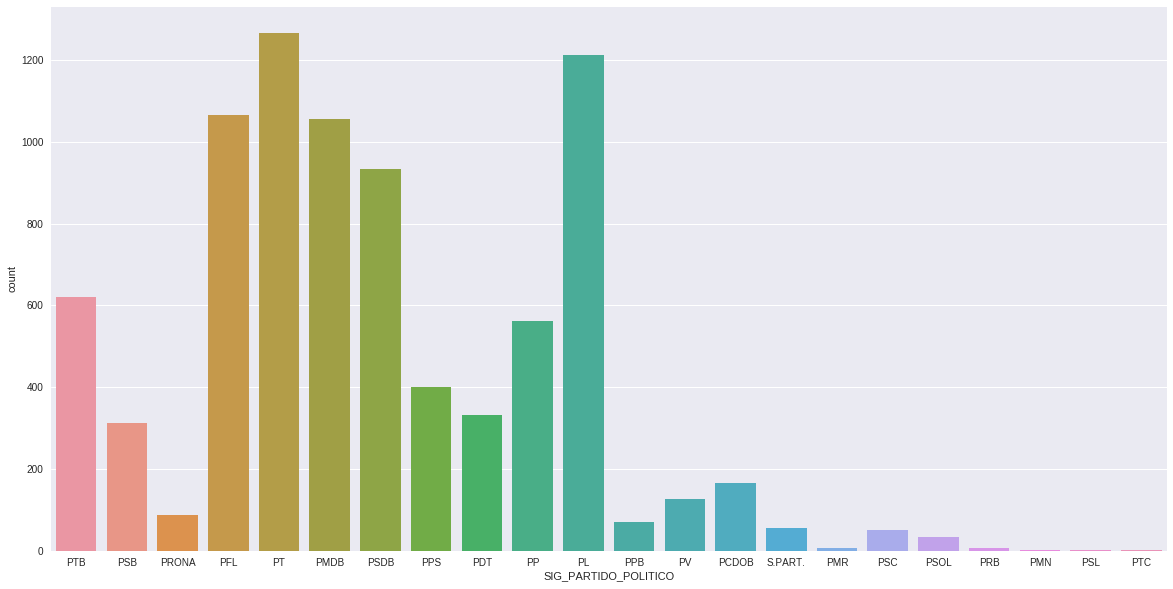

In [30]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_PARTIDO_POLITICO'], label = "Quantidade")

#### Ranking dos 6 partidos com mais proposições e as respectivas quantidades:

In [49]:
pp_list = data['SIG_PARTIDO_POLITICO'].tolist()
pp_counter = {}

for pp in pp_list:
    if pp in pp_counter:
        pp_counter[pp] += 1
    else:
        pp_counter[pp] = 1
        
popular_pp = sorted(pp_counter, key = pp_counter.get, reverse = True)
top_7 = popular_pp[:7]

for pp in top_7:
    if type(pp) != float:
        print(pp + ': ' + str(pp_counter[pp]) + ' proposições')
    else:
        print('Sem informação de partido: ' + str(pp_counter[pp]) + ' proposições')

Sem informação de partido: 3531 proposições
PT: 1266 proposições
PL: 1212 proposições
PFL: 1065 proposições
PMDB: 1055 proposições
PSDB: 933 proposições
PTB: 620 proposições


#### Lista de todos os partidos e suas respectivas quantidades:

In [32]:
print(pp_counter)

{'PTB': 620, 'PSB': 312, 'PRONA': 87, 'PFL': 1065, 'PT': 1266, 'PMDB': 1055, 'PSDB': 933, 'PPS': 400, 'PDT': 332, 'PP': 562, 'PL': 1212, 'PPB': 71, 'PV': 127, 'PCDOB': 167, 'S.PART.': 55, 'PMR': 6, nan: 3531, 'PSC': 52, 'PSOL': 34, 'PRB': 6, 'PMN': 2, 'PSL': 3, 'PTC': 1}


## Proposições x Nome do Parlamentar

#### Ranking dos 10 deputados com mais proposições:

In [51]:
name_list = data['NOM_PARLAMENTAR'].tolist()
name_counter = {}

for name in name_list:
    if name in name_counter:
        name_counter[name] += 1
    else:
        name_counter[name] = 1
        
popular_name = sorted(name_counter, key = name_counter.get, reverse = True)
top_10 = popular_name[:11]

for name in top_10:
    if type(name) != float:
        print(name + ': ' + str(name_counter[name]) + ' proposições')
    else:
        print('Sem informação do nome do deputado: ' + str(name_counter[name]) + ' proposições')

Sem informação do nome do deputado: 3530 proposições
CARLOS NADER: 638 proposições
ROGERIO SILVA: 139 proposições
CARLOS SOUZA: 131 proposições
ANTONIO CARLOS MENDES THAME: 104 proposições
ALBERTO FRAGA: 97 proposições
ALMIR MOURA: 91 proposições
CELSO RUSSOMANNO: 91 proposições
LAURA CARNEIRO: 88 proposições
POMPEO DE MATTOS: 86 proposições
EDUARDO PAES: 84 proposições


#### Média de proposições por deputado:

In [37]:
counter = 0
for name in name_counter:
    counter = counter + name_counter[name]
    
print("Média de proposições por candidato: %.2f" % ((counter-3530)/(len(name_counter)-1)))  # 3530 proposições sem nome do deputado (nan)

Média de proposições por candidato: 15.76


#### Lista com todos os deputados e a quantidade de proposições feitas por cada um durante todos os anos de mandato se encontra no arquivo *deputados&qnt_proposicoes_2002_2006.txt* dentro do diretório *deputados&qnt_proposicoes* neste mesmo repositório.